In [35]:
import numpy as np
import matplotlib.pyplot as plt

Approximation for 
\begin{equation}
y(x) = x^3 - 10x^2 + 3x + 500
\end{equation} 
with and without L2 regularizator

In [40]:
x = np.arange(0, 10.1, 0.1)
y = np.array([a**3 - 10*a**2 + 3*a + 500 for a in x])

x_train, y_train = x[::2], y[::2]

print(x)

N = 12 # размер признакового пространства (степень полинома N-1)
L = 1 # коэффициент лямбда; при увеличении N увеличивается L 

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [37]:
X = np.array([[a**n for n in range (N)] for a in x]) # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range (N)] for i in range (N)]) # единичная матрица * L
IL[0][0] = 0 # первый коэффициент не регуляризуем
print (IL)
X_train = X[::2]
Y = y_train

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


вычисляем коэффициенты по формуле 
\begin{equation}
w = (X^TX + \lambda I)^{-1} X^T Y
\end{equation}

In [38]:
A = np.linalg.inv(X_train.T@X_train + IL)
w = Y@X_train@A

print (w)

[ 5.00179386e+02 -1.54581714e+00 -2.44083488e+00 -2.26814044e+00
 -6.55854106e-01  1.00667071e+00 -3.74573290e-01  7.33419210e-02
 -8.44939426e-03  5.73772937e-04 -2.11821025e-05  3.25906285e-07]


отображение исходного графика и его прогноза:

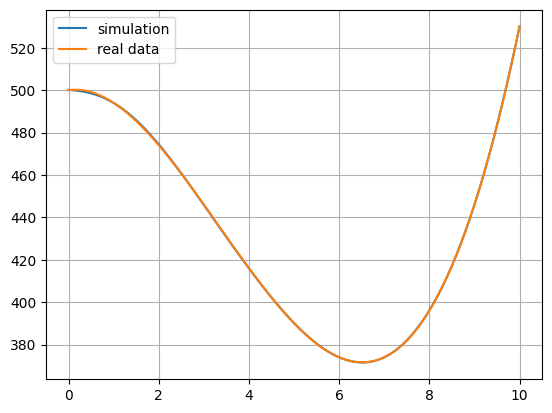

In [39]:
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy, label = "simulation")
plt.plot(x, y, label = "real data")
plt.legend()
plt.grid(True)